In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1:

In [2]:
x = np.arange(6)+1 # gia tri x co the nha
y = np.arange(6)+1 # gia tri y co the nhan
jpmf = np.ones((6,6))*1/36

In [3]:
pmfx = np.sum(jpmf, axis=0) # ham trong so bien cua x
pmfy = np.sum(jpmf, axis=1) # ham trong so bien cua y
print(pmfx)
print(pmfy)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Hàm phân phối biên của X: 
 [0.16666666666666669, 0.33333333333333337, 0.5, 0.6666666666666667, 0.8333333333333335, 1.0000000000000002]


[Text(0.5, 0, 'Số chấm (x) trên mặt của xúc sắc thứ 1'),
 Text(0, 0.5, 'Hàm phân phối biên của x')]

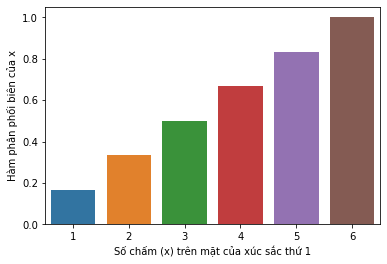

In [4]:
# Hàm phân phối biên của X
cdfx = []
for i in range(len(pmfx)):
    cdfx.append(pmfx[:i+1].sum())
print('Hàm phân phối biên của X: \n', cdfx)
# Hàm phân phối biên của Y
CDFx = sns.barplot(x=x,y=cdfx)
CDFx.set(xlabel='Số chấm (x) trên mặt của xúc sắc thứ 1', ylabel='Hàm phân phối biên của x')

Hàm phân phối biên của Y: 
 [0.16666666666666669, 0.33333333333333337, 0.5, 0.6666666666666667, 0.8333333333333335, 1.0000000000000002]


[Text(0.5, 0, 'Số chấm (y) trên mặt của xúc sắc thứ 2'),
 Text(0, 0.5, 'Hàm phân phối biên của y')]

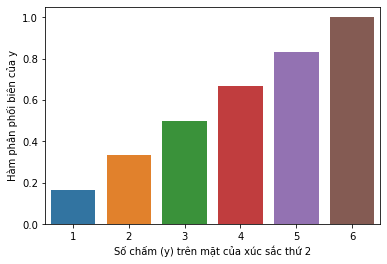

In [5]:
# Hàm phân phối biên của X
cdfy = []
for i in range(len(pmfx)):
    cdfy.append(pmfx[:i+1].sum())
    
print('Hàm phân phối biên của Y: \n', cdfy)
# Hàm phân phối biên của Y
CDFy = sns.barplot(x=y,y=cdfy)
CDFy.set(xlabel='Số chấm (y) trên mặt của xúc sắc thứ 2', ylabel='Hàm phân phối biên của y')

In [6]:
# Ky vong cua X, Y
EX = np.sum(x*pmfx); EY=np.sum(y*pmfy)
print('Kỳ vọng của X, Y lần lượt là', EX, EY)

Kỳ vọng của X, Y lần lượt là 3.5 3.5


In [7]:
# Phuong sai cua X, Y
varX = np.sum((x-EX)**2*pmfx); varY=np.sum((y-EY)**2*pmfy) # Phuong sai
print('Phương sai của X, Y lần lượt là', varX,varY)

Phương sai của X, Y lần lượt là 2.916666666666667 2.916666666666667


In [8]:
EXY = 0 # Ham tuong quan
for i in x:
    for j in y:
        EXY = EXY + i*j*jpmf[j-1,i-1]
covXY=EXY-EX*EY # Hiep phuong sai
if np.allclose(covXY,0)==True:
    covXY = 0
    print('Hiệp phương sai cov(X,Y) bằng 0')
    print('Hệ số tương quan rho(X,Y) bằng 0')
else:
    print('Hiệp phương sai cov(X,Y) bằng', covXY)
    print('Hệ số tương quan \rho (X,Y) bằng', covXY/np.sqrt(varX*varY))
    

Hiệp phương sai cov(X,Y) bằng 0
Hệ số tương quan rho(X,Y) bằng 0


In [9]:
# Ma trận hiệp phương sai của (X,Y)
COV = np.array([[varX, covXY],[covXY, varY]])
print('Ma trận hiệp phương sai: \n', COV)

Ma trận hiệp phương sai: 
 [[2.91666667 0.        ]
 [0.         2.91666667]]


# Exercise 2:

In [10]:
mean = [1,2]
cov = [[25,0],[0,9]]

In [11]:
print('vector ky vong:', mean)
print('ma tran hiep phuong sai:', cov)

vector ky vong: [1, 2]
ma tran hiep phuong sai: [[25, 0], [0, 9]]


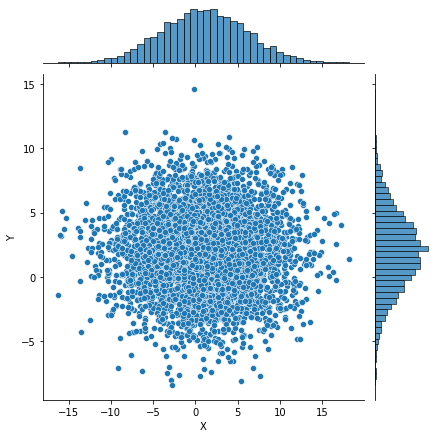

In [12]:
X, Y = np.random.multivariate_normal(mean, cov, 5000).T
sns.jointplot(x=X,y=Y).set_axis_labels('X','Y')